## Observations and Insights 

In [25]:
# 1. Capomulin and Ramicane seem to be the most successful regimens as they both have the lowest tumor volume over time points, lowest Var/STD/SEM, as well as the highest mice count overall, indicating high survival rate.
# 2. Deeper dive in Capomulin shows that there's some correlation between mouse weight and tumor volume (as tumor volume goes up, so does mouse weight), but there's also big range of tumor volume within same mouse weight. 
# 3. The outliers seem very far from the median, including a negative value, so would be worth looking deeper into these to see if there's bad datathat could affect overall analysis of the promising regimens. 
    

In [5]:
%matplotlib inline

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [7]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data.head() #1893 rows

combined_data.isnull().values.any()

False

In [10]:
# Checking the number of mice in the DataFrame.
raw_count = {"Mice Count: Raw Data": [len(combined_data["Mouse ID"])]}
raw_count_df = pd.DataFrame(raw_count)
raw_count_df



,Mice Count: Raw Data
0,1893


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
combined_clean #1883 rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_count = {"Mice Count: Clean Data": [len(combined_clean["Mouse ID"])]}
clean_count_df = pd.DataFrame(clean_count)
clean_count_df


,Mice Count: Clean Data
0,1883


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_data = combined_clean[['Drug Regimen', 'Tumor Volume (mm3)']]
summary_table = summary_data.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

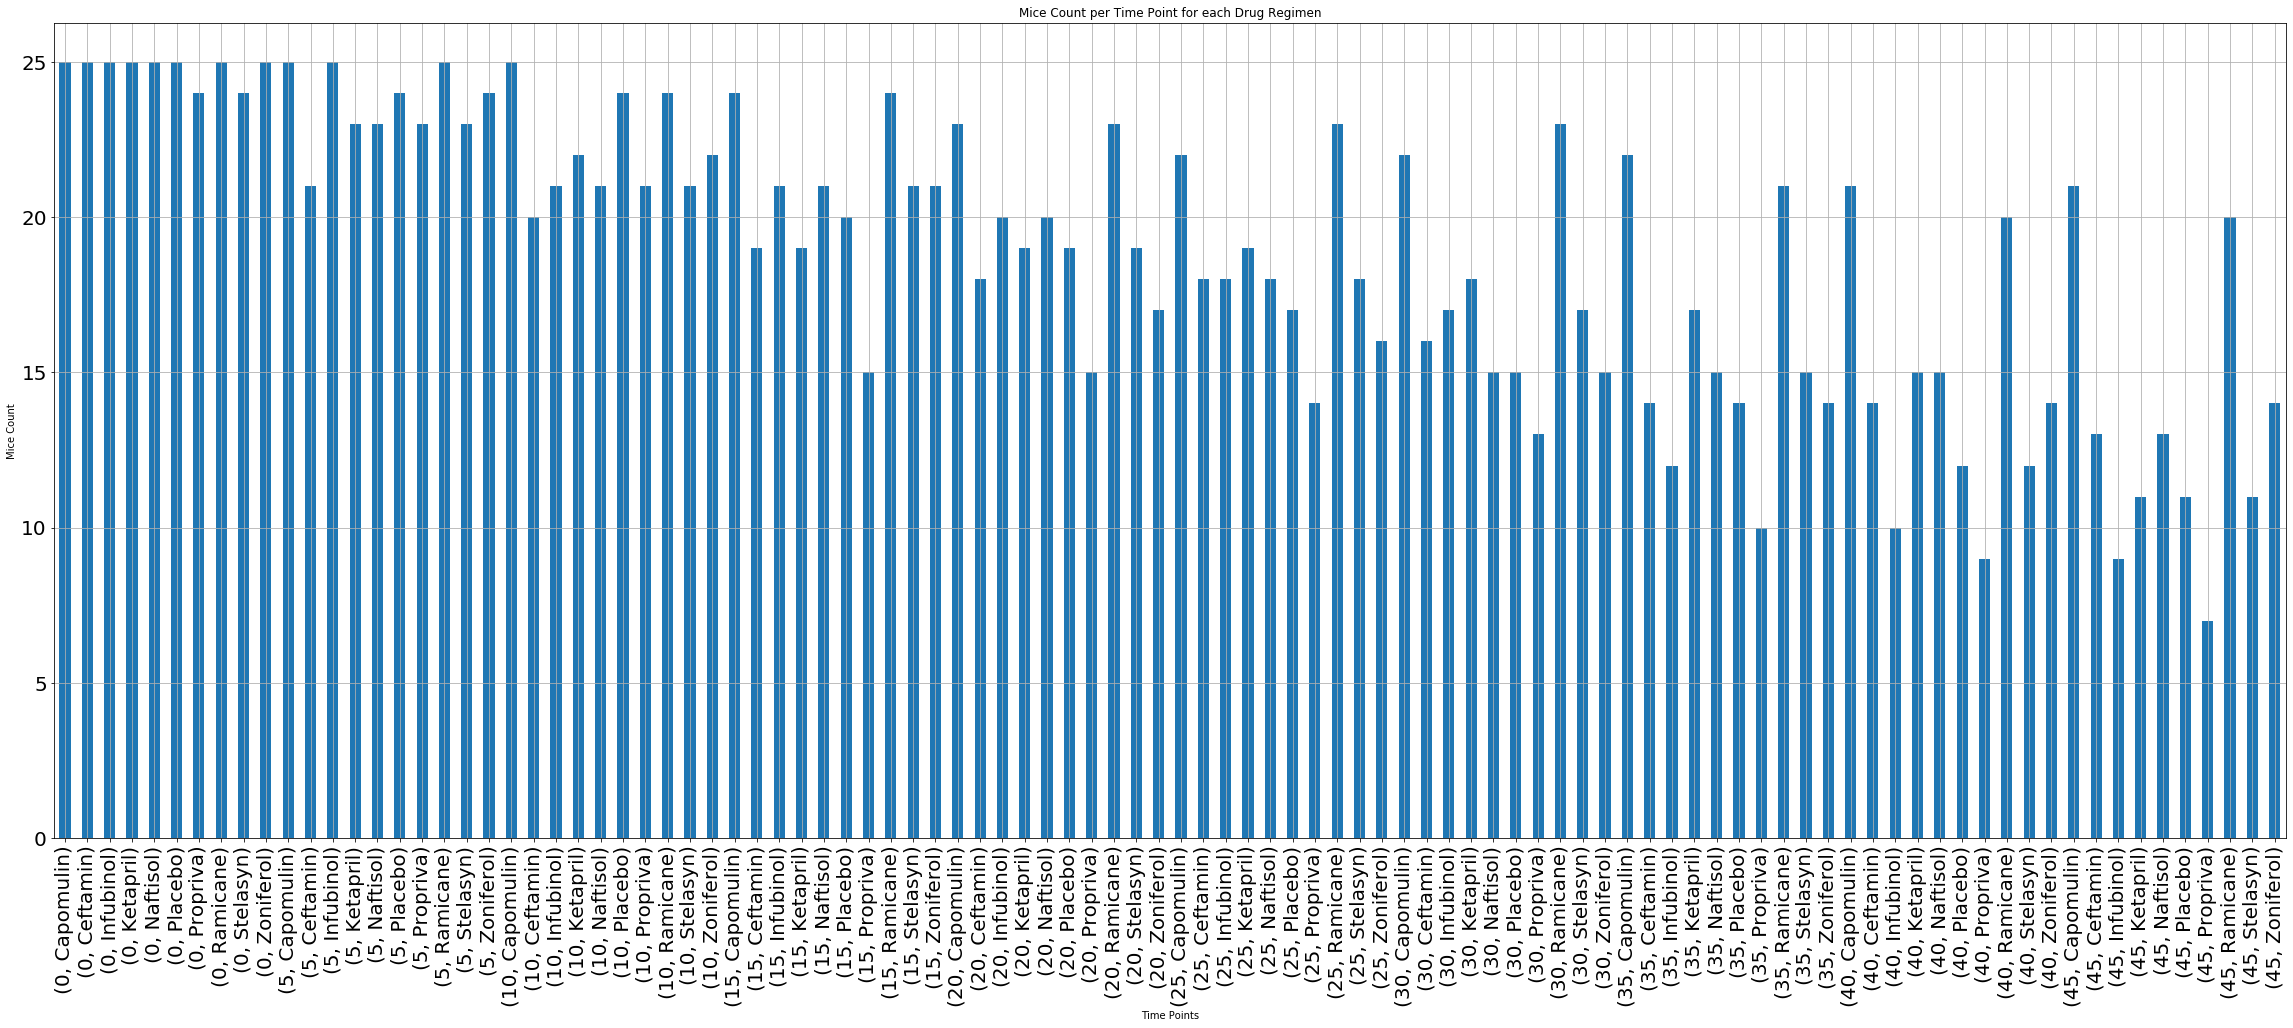

In [14]:
# Groupby clean df by 'Timepoint' and 'Drug Regimen'
drug_timepoint_group = combined_clean.groupby(['Timepoint', 'Drug Regimen'])

# Calculate count of mice by 'Timepoint' and 'Drug Regimen'
mice_count = drug_timepoint_group['Mouse ID'].count()
mice_count.sort_values(ascending=True)

# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_timepoint_bar = mice_count.plot(kind='bar', figsize=(40,15), grid=True, label='index', fontsize=20)
mice_timepoint_bar.set_xlabel("Time Points")
mice_timepoint_bar.set_ylabel("Mice Count")
mice_timepoint_bar.set_title("Mice Count per Time Point for each Drug Regimen")
plt.show()

# Note to TA's: Different color bars for each group would help this visual. Analysis is that most drug regimens started with same number
# of mice, but as the timepoints progressed, some regimens kept high number of mice alive while others had varying degrees of mice death. 

Text(0.5, 1.0, 'Mice Count per Time Point for each Drug Regimen')

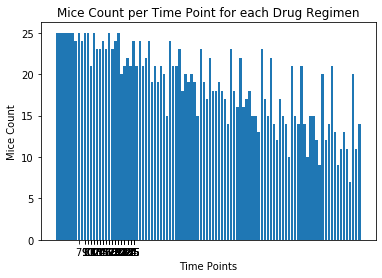

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using 
# pyplot.

x_axis = np.arange(len(mice_count))

plt.bar(x_axis, mice_count)
plt.xticks(mice_count)
plt.xlabel("Time Points")
plt.ylabel("Mice Count")
plt.title("Mice Count per Time Point for each Drug Regimen")

# Note to TA's: I had trouble changing figsize and adding xticks to output on this version.

## Pie Plots

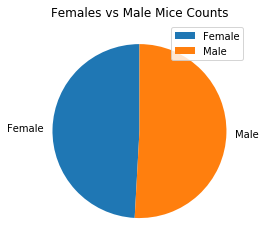

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_count = sum(combined_clean['Sex'] == 'Female')
male_count = sum(combined_clean['Sex'] == 'Male')
sex_count = pd.DataFrame({
    "": [female_count, male_count]},
    index = ["Female", "Male"])

sex_pie_chart = sex_count.plot(kind="pie", y="", startangle=90)
sex_pie_chart.set_title("Females vs Male Mice Counts")
plt.show()



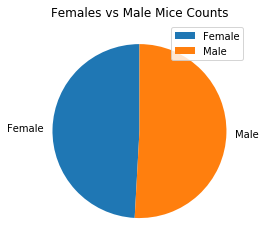

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = "Female", "Male"
counts = [female_count, male_count]

plt.pie(counts, labels=labels, startangle=90)
plt.title("Females vs Male Mice Counts")
plt.legend(labels, loc="best", )
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

promising_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_filtered = combined_clean[combined_clean["Drug Regimen"].isin(promising_regimens)]
drug_filtered_2 = drug_filtered[drug_filtered["Timepoint"] == 45]
  

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = drug_filtered_2["Tumor Volume (mm3)"].quantile(q=[.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635
The the median of tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


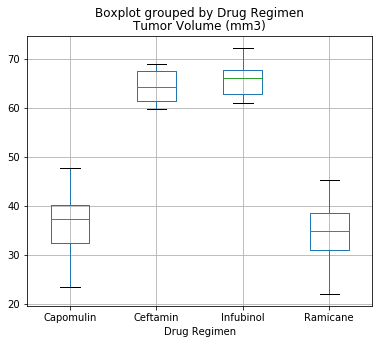

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_filtered_2.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)', figsize= (6, 5))

## Line and Scatter Plots

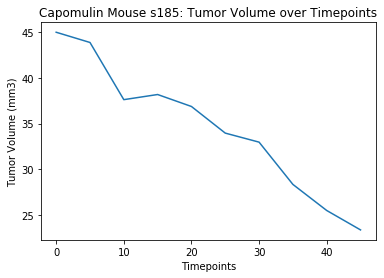

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = combined_clean[combined_clean['Drug Regimen'] == 'Capomulin']
capomulin_mouse = capomulin[capomulin['Mouse ID'] == 's185']

x_axis = capomulin_mouse['Timepoint']
data = capomulin_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, data)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Mouse s185: Tumor Volume over Timepoints')
plt.show()

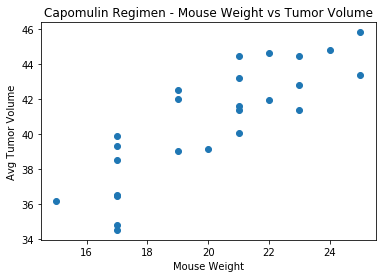

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = pd.DataFrame(capomulin)
capomulin_groupby = capomulin_df.groupby(by='Mouse ID')

x_values = capomulin_groupby['Weight (g)'].mean()
y_values = capomulin_groupby['Tumor Volume (mm3)'].mean()

plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.title('Capomulin Regimen - Mouse Weight vs Tumor Volume')
plt.show()


## Correlation and Regression

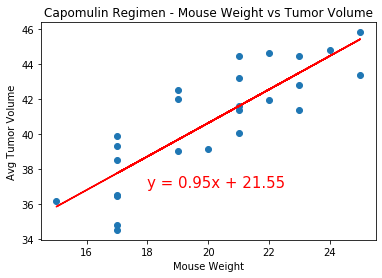

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.title('Capomulin Regimen - Mouse Weight vs Tumor Volume')
plt.show()
